In [19]:
import pandas as pd
import json
from environs import Env
from neo4j import GraphDatabase


env = Env()
env.read_env()

EPIGRAPHDB_SERVER = env.str("EPIGRAPHDB_SERVER")
EPIGRAPHDB_USER = "neo4j"
EPIGRAPHDB_PORT = env.str("EPIGRAPHDB_PORT")
EPIGRAPHDB_PASSWORD = env.str("EPIGRAPHDB_PASSWORD")
print(EPIGRAPHDB_PORT)

epigraphdb_driver = GraphDatabase.driver(
    "bolt://{server_name}:{port}".format(
        server_name=EPIGRAPHDB_SERVER, port=EPIGRAPHDB_PORT),
    auth=(EPIGRAPHDB_USER, EPIGRAPHDB_PASSWORD))

session = epigraphdb_driver.session()


def query_to_df(query, to_print=True):
    if to_print:
        print(query)
    data=session.run(query).data()
    df = pd.json_normalize(data)
    return(df)

37687


## Genes from GWAS + expressed in Breast tissue

In [59]:
genes_gwas_exp = pd.read_csv("query_results/bc_gwas_expressed_in_breastTissue.tsv", sep = '\t')
gene_list = list(set(genes_gwas_exp['gene.name']))
len(gene_list)

98

In [60]:
# review which are drug targets 
query="""
match (g:Gene)-[]-(drug:Drug)
where g.name in {}
return  g.name, collect(drug.label) as Drugs, count(drug.label) as nDrugs
""".format(gene_list)
df= query_to_df(query)
df


match (g:Gene)-[]-(drug:Drug)
where g.name in ['ZBTB38', 'CREB5', 'CASP8', 'TTC28', 'ABO', 'TACC2', 'ITPR1', 'MTMR11', 'MLLT10', 'KANSL1', 'CCDC88C', 'TET2', 'ZMIZ1', 'ELL', 'CDKN2B', 'ATAD5', 'CBX8', 'USHBP1', 'SV2A', 'FILIP1L', 'KCNN4', 'MKL1', 'ADSSL1', 'NREP', 'GAREM', 'SUB1', 'RCCD1', 'OR2A1-AS1', 'ARRDC3', 'MCM8', 'HSPA4', 'CDYL2', 'RNF115', 'FOXP1', 'RPL23AP53', 'RANBP9', 'LGR6', 'ZFPM2', 'OTUD7B', 'ULK3', 'LSP1', 'PEX14', 'RP11-134G8.8', 'GATAD2A', 'PLA2G6', 'ZNF184', 'RAD51B', 'CMSS1', 'SCAMP2', 'TLR1', 'PIDD', 'L3MBTL3', 'CHEK2', 'ATXN7', 'SLC25A22', 'VPS33B', 'RIN3', 'MYEOV', 'LMX1B', 'EBF1', 'TCF7L2', 'ARHGEF5', 'ASTN2', 'TGFBR2', 'NRIP1', 'AMFR', 'TRIM46', 'HSCB', 'STXBP4', 'CDCA7L', 'PRC1', 'GIPR', 'LINC-PINT', 'MAGI3', 'ADCY3', 'BABAM1', 'KRTCAP2', 'DNAJC1', 'FAM46A', 'PHLDA3', 'CUX1', 'PDE4D', 'SETBP1', 'ATG10', 'MDM4', 'N4BP2L1', 'ESR1', 'ADCY9', 'GRHL1', 'FGFR2', 'NEK10', 'SSBP4', 'FAM175A', 'VGLL3', 'ANKLE1', 'SF3B4', 'FTO', 'PIK3R3']
return  g.name, collect(drug.la

,g.name,Drugs,nDrugs
0,ESR1,"[AFIMOXIFENE, ESTRADIOL, ESTRADIOL VALERATE, B...",26
1,FGFR2,"[REGORAFENIB, ENMD-981693, TG100-801, ERDAFITI...",18
2,PIK3R3,"[GEDATOLISIB, DACTOLISIB, SAMOTOLISIB, APITOLI...",22
3,PDE4D,"[DIPYRIDAMOLE, PENTOXIFYLLINE, FLAVOXATE, THEO...",11
4,CASP8,"[EMRICASAN, NIVOCASAN]",2
5,CHEK2,"[PREXASERTIB, XL-844]",2
6,KCNN4,"[CHLORZOXAZONE, SENICAPOC]",2
7,SV2A,"[LEVETIRACETAM, BRIVARACETAM]",2


In [23]:
# get disease that map to those drugs
query="""
match (gene:Gene)-[]-(drug:Drug)-[]-(d:Disease)
where gene.name in {}
and not (d.label = 'enterobiasis')
return gene.name , drug.label, d.label
""".format(gene_list)
df= query_to_df(query)
df


match (gene:Gene)-[]-(drug:Drug)-[]-(d:Disease)
where gene.name in ['ZBTB38', 'CREB5', 'CASP8', 'TTC28', 'ABO', 'TACC2', 'ITPR1', 'MTMR11', 'MLLT10', 'KANSL1', 'CCDC88C', 'TET2', 'ZMIZ1', 'ELL', 'CDKN2B', 'ATAD5', 'CBX8', 'USHBP1', 'SV2A', 'FILIP1L', 'KCNN4', 'MKL1', 'ADSSL1', 'NREP', 'GAREM', 'SUB1', 'RCCD1', 'OR2A1-AS1', 'ARRDC3', 'MCM8', 'HSPA4', 'CDYL2', 'RNF115', 'FOXP1', 'RPL23AP53', 'RANBP9', 'LGR6', 'ZFPM2', 'OTUD7B', 'ULK3', 'LSP1', 'PEX14', 'RP11-134G8.8', 'GATAD2A', 'PLA2G6', 'ZNF184', 'RAD51B', 'CMSS1', 'SCAMP2', 'TLR1', 'PIDD', 'L3MBTL3', 'CHEK2', 'ATXN7', 'SLC25A22', 'VPS33B', 'RIN3', 'MYEOV', 'LMX1B', 'EBF1', 'TCF7L2', 'ARHGEF5', 'ASTN2', 'TGFBR2', 'NRIP1', 'AMFR', 'TRIM46', 'HSCB', 'STXBP4', 'CDCA7L', 'PRC1', 'GIPR', 'LINC-PINT', 'MAGI3', 'ADCY3', 'BABAM1', 'KRTCAP2', 'DNAJC1', 'FAM46A', 'PHLDA3', 'CUX1', 'PDE4D', 'SETBP1', 'ATG10', 'MDM4', 'N4BP2L1', 'ESR1', 'ADCY9', 'GRHL1', 'FGFR2', 'NEK10', 'SSBP4', 'FAM175A', 'VGLL3', 'ANKLE1', 'SF3B4', 'FTO', 'PIK3R3']
and not (d

,gene.name,drug.label,d.label
0,ESR1,AFIMOXIFENE,ductal breast carcinoma in situ
1,FGFR2,REGORAFENIB,neoplasm (disease)
2,FGFR2,ENMD-981693,exocrine pancreatic carcinoma
3,FGFR2,TG100-801,wet macular degeneration
4,FGFR2,ERDAFITINIB,urothelial carcinoma
...,...,...,...
92,ESR1,POLYESTRADIOL PHOSPHATE,neoplasm (disease)
93,ESR1,DIETHYLSTILBESTROL DIPHOSPHATE,neoplasm (disease)
94,ESR1,LASOFOXIFENE,osteoporosis
95,ESR1,ARZOXIFENE,postmenopausal osteoporosis


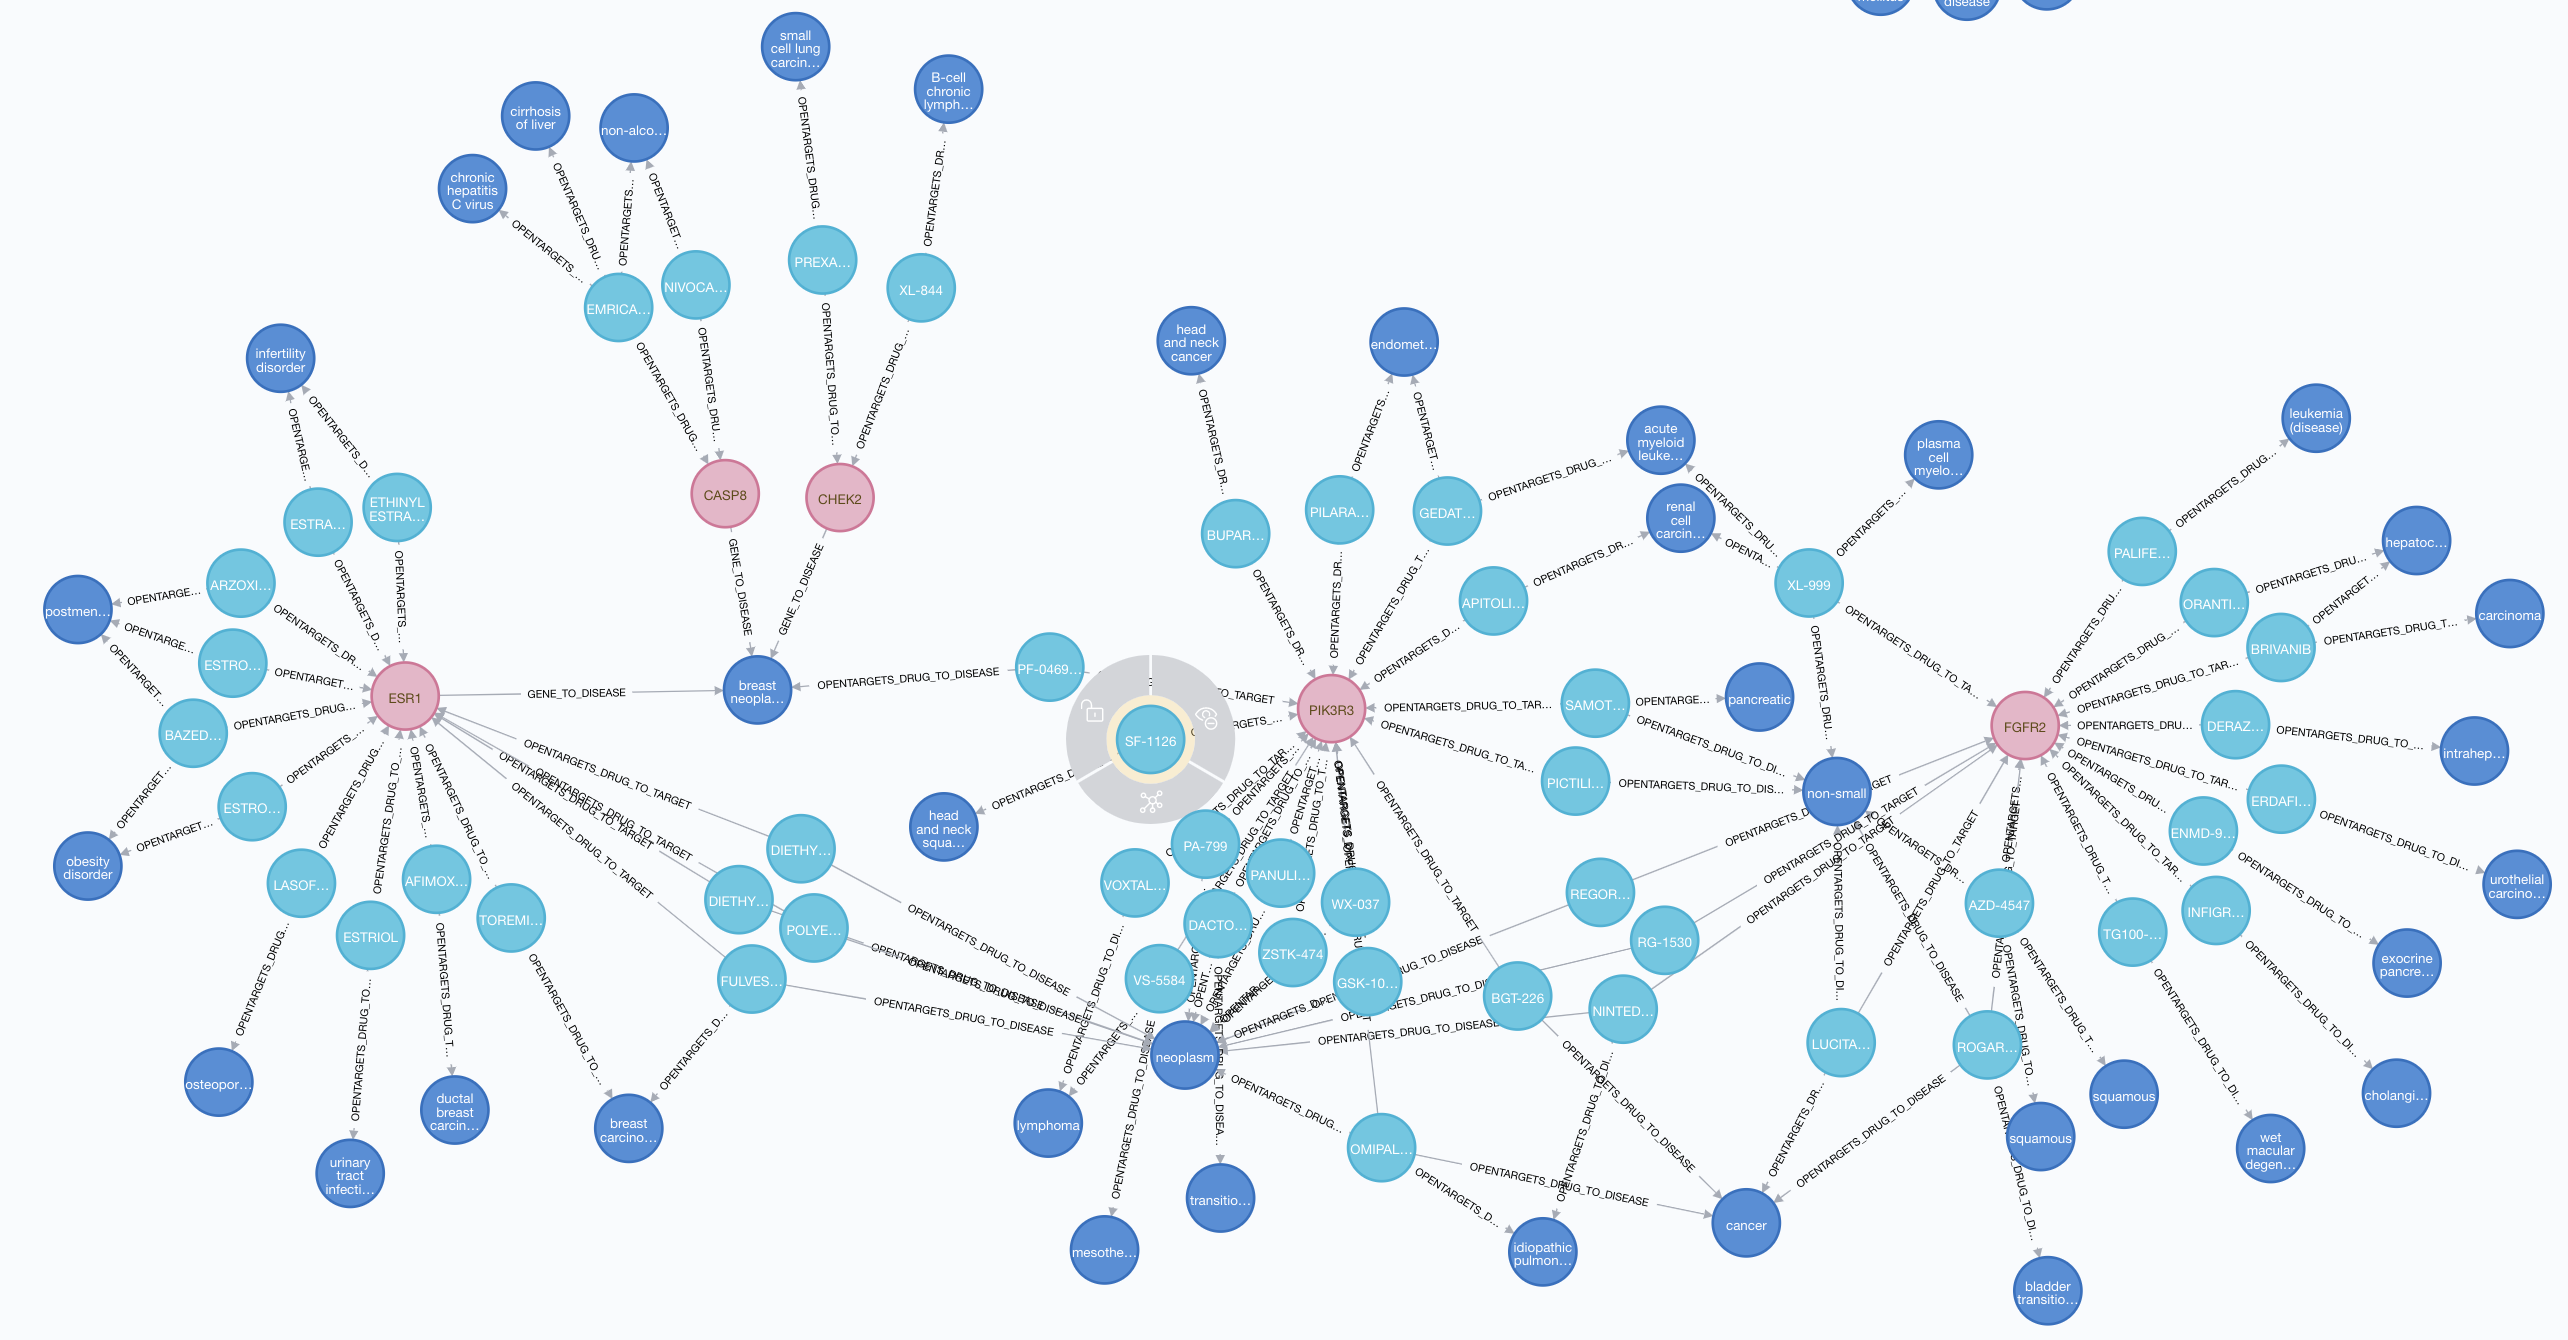

In [15]:
from IPython.display import Image
Image(filename = "figures/gwas_exp_genes_to_drugs_p1.png")

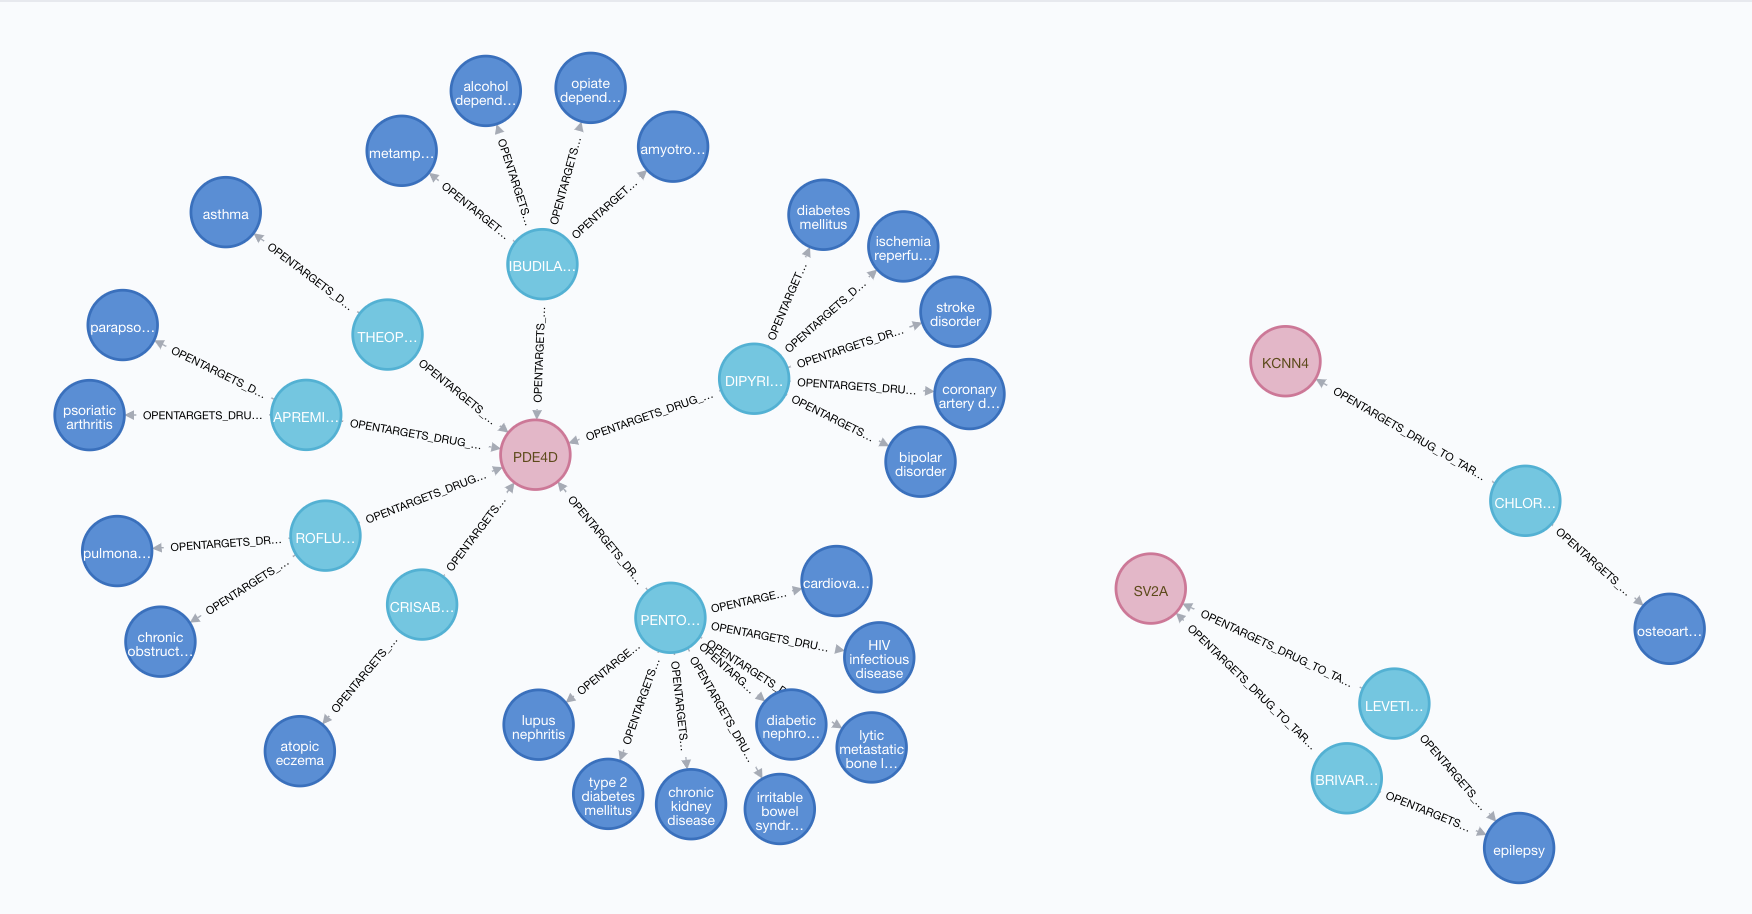

In [14]:
Image(filename = "figures/gwas_exp_genes_to_drugs_p2.png")

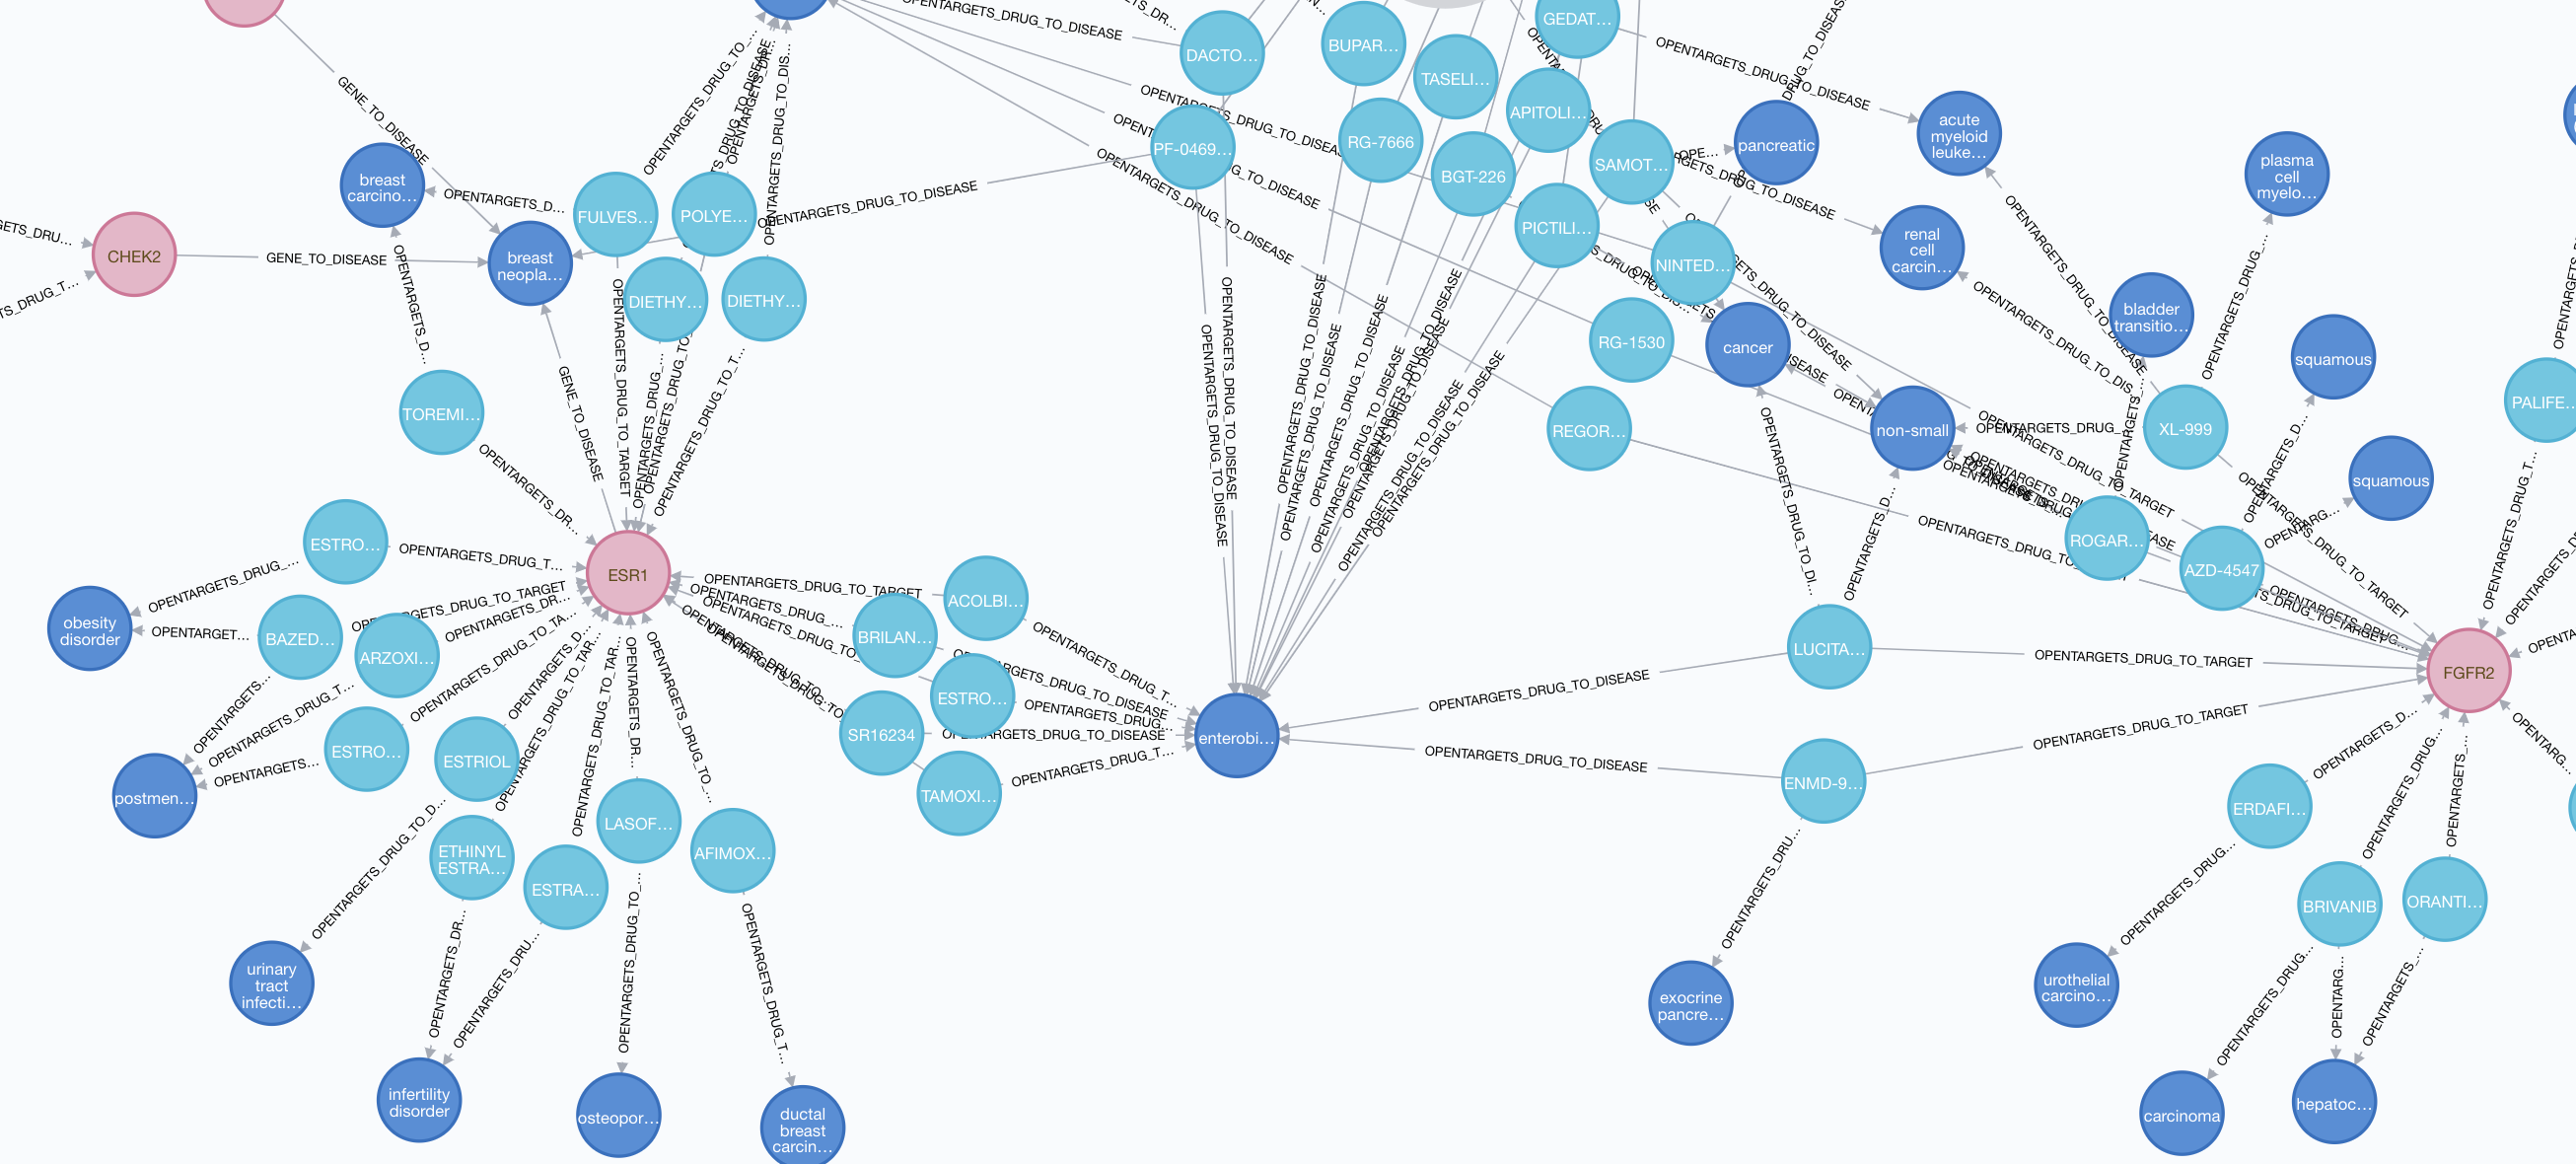

In [13]:
Image(filename = "figures/gwas_exp_genes_to_drugs_entero.png")

In [47]:
# genes and diseases they target
df2 = df[['gene.name', 'd.label']].drop_duplicates()
df2

,gene.name,d.label
0,ESR1,ductal breast carcinoma in situ
1,FGFR2,neoplasm (disease)
2,FGFR2,exocrine pancreatic carcinoma
3,FGFR2,wet macular degeneration
4,FGFR2,urothelial carcinoma
...,...,...
84,ESR1,postmenopausal osteoporosis
85,ESR1,neoplasm (disease)
86,ESR1,breast carcinoma
91,ESR1,urinary tract infection (disease)


In [48]:
cancer_related = ['cancer', 'neoplasm', 'lymphoma', 'carcin', 'oma', 'leukemia', 'metasta']
df2['is_it_cancer'] = 'no'
for ind in df2.index:
    label = df2['d.label'][ind]
    res = [ele for ele in cancer_related if(ele in label)] 
    if bool(res):
        df2['is_it_cancer'][ind]= 'yes'
        

In [54]:
pd.Series(df2.groupby(["gene.name", "is_it_cancer"]).size())

gene.name  is_it_cancer
CASP8      no               3
CHEK2      yes              2
ESR1       no               5
           yes              3
FGFR2      no               2
           yes             16
KCNN4      no               1
PDE4D      no              22
           yes              1
PIK3R3     no               1
           yes             13
SV2A       no               1
dtype: int64

In [55]:
# So genes that are drug tagets for cancer-related deisease: 
genes1 = ['CHEK2' , 'ESR1', 'FGFR2', 'PDE4D', 'PIK3R3']

In [58]:
genes_gwas_exp[genes_gwas_exp['gene.name'].isin(genes1)]

,gwas.id,gwas_to_variant.beta,gwas_to_variant.pval,variant.name,gene.name,TPM,tissue.name,tpm_category
29,ieu-a-1126,0.0364,2.948017e-08,rs1707302,PIK3R3,32.5050,Breast - Mammary Tissue,medium
30,ieu-a-1127,0.0466,2.745997e-09,rs1707302,PIK3R3,32.5050,Breast - Mammary Tissue,medium
96,ieu-a-1126,-0.2030,1.000000e-200,rs7895676,FGFR2,8.6020,Breast - Mammary Tissue,low
97,ieu-a-1127,0.2298,1.000000e-200,rs4752569,FGFR2,8.6020,Breast - Mammary Tissue,low
98,ieu-a-1127,0.1492,2.984008e-11,rs151309152,FGFR2,8.6020,Breast - Mammary Tissue,low
118,ieu-a-1126,0.0663,1.307073e-26,rs2747652,ESR1,5.7375,Breast - Mammary Tissue,low
119,ieu-a-1126,0.1352,1.270867e-13,rs76956704,ESR1,5.7375,Breast - Mammary Tissue,low
120,ieu-a-1127,0.1107,6.668068e-14,rs6904031,ESR1,5.7375,Breast - Mammary Tissue,low
121,ieu-a-1128,0.0991,1.926194e-18,rs2747652,ESR1,5.7375,Breast - Mammary Tissue,low
122,ieu-a-1128,0.2193,1.494858e-11,rs76956704,ESR1,5.7375,Breast - Mammary Tissue,low
